# Tutorial: CNN  
Tutorial link: https://medium.com/@nutanbhogendrasharma/pytorch-convolutional-neural-network-with-mnist-dataset-4e8a4265e118

In [1]:
import torch

In [2]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cpu')

In [3]:
from torchvision import datasets
from torchvision.transforms import ToTensor

train_data = datasets.MNIST(
    root = 'data',
    train = True,
    transform = ToTensor(),
    download = True
)

test_data = datasets.MNIST(
    root = 'data',
    train = False,
    transform = ToTensor()
)

In [80]:
type(train_data)

torchvision.datasets.mnist.MNIST

In [70]:
print(train_data)

Dataset MNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor()


In [71]:
print(test_data)

Dataset MNIST
    Number of datapoints: 10000
    Root location: data
    Split: Test
    StandardTransform
Transform: ToTensor()


In [72]:
print(train_data.data.size())

torch.Size([60000, 28, 28])


In [73]:
print(train_data.targets.size())

torch.Size([60000])


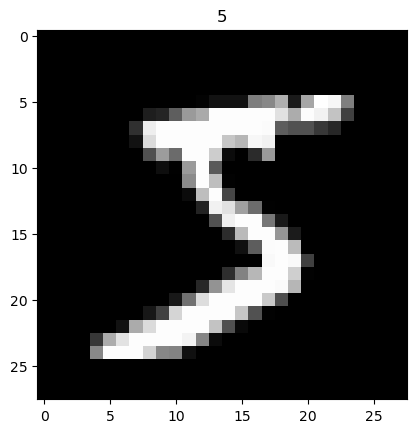

In [74]:
import matplotlib.pyplot as plt

plt.imshow(train_data.data[0], cmap='gray')
plt.title('%i' % train_data.targets[0])
plt.show()

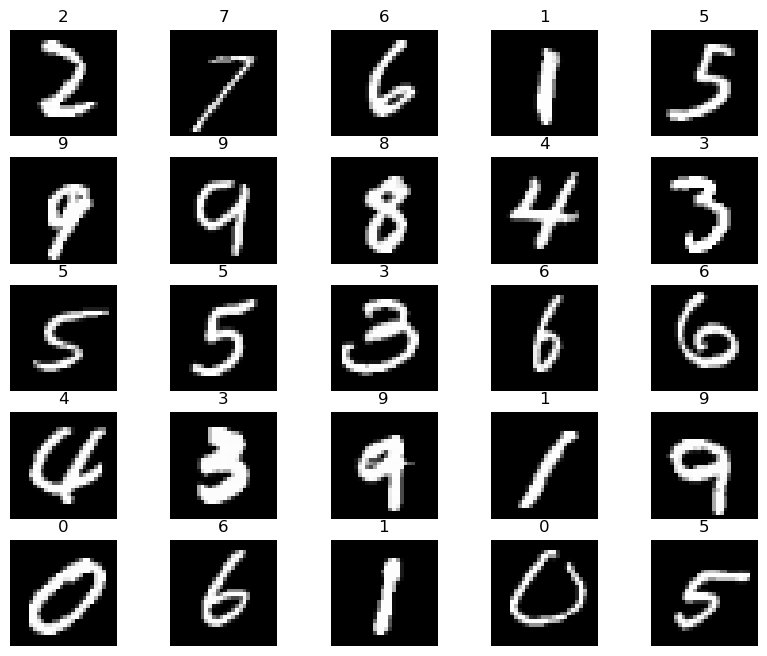

In [75]:
figure = plt.figure(figsize=(10,8))
cols, rows = 5, 5
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(train_data), size=(1,)).item()
    img, label = train_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(label)
    plt.axis('off')
    plt.imshow(img.squeeze(), cmap='gray')
plt.show()

In [76]:
from torch.utils.data import DataLoader

loaders = {
    'train' : torch.utils.data.DataLoader(train_data,
                                         batch_size = 100,
                                         shuffle=True,
                                         num_workers=1),
    'test' : torch.utils.data.DataLoader(test_data, 
                                         batch_size = 100, 
                                         shuffle=True,
                                         num_workers=1)
}
loaders

{'train': <torch.utils.data.dataloader.DataLoader at 0x27d0da6fb10>,
 'test': <torch.utils.data.dataloader.DataLoader at 0x27d0b7fb350>}

In [78]:
sample = next(iter(loaders['train']))
imgs, lbls = sample

In [79]:
imgs.shape

torch.Size([100, 1, 28, 28])

In [20]:
import torch.nn as nn

class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        
        self.conv1 = nn.Sequential(
            nn.Conv2d(
                in_channels=1,
                out_channels=16,
                kernel_size=5,
                stride=1,
                padding=2,
            ),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2),
        )
        self.conv2 = nn.Sequential(
            nn.Conv2d(16, 32, 5, 1, 2),
            nn.ReLU(),
            nn.MaxPool2d(2),
        )
        # fully connected layer, output 10 classes
        self.out = nn.Linear(32 * 7 * 7, 10)
    
    def forward(self, x):
        x = self.conv1(x)
        x = self.conv2(x)
        
        # flattern the output of conv2 to (batch size 32 * 7 * 7)
        x = x.view(x.size(0), -1)
        output = self.out(x)
        return output, x # return x for visualization

In [60]:
cnn = CNN()
print(cnn)

CNN(
  (conv1): Sequential(
    (0): Conv2d(1, 16, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv2): Sequential(
    (0): Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (out): Linear(in_features=1568, out_features=10, bias=True)
)


In [61]:
loss_func = nn.CrossEntropyLoss()
loss_func

CrossEntropyLoss()

In [62]:
from torch import optim
optimizer = optim.Adam(cnn.parameters(), lr = 0.01)
optimizer

Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: None
    lr: 0.01
    maximize: False
    weight_decay: 0
)

In [15]:
from torch.autograd import Variable

num_epochs = 10

def train(num_epochs, cnn, loaders):
    cnn.train()
    
    # Train the model
    total_step = len(loaders['train'])
    
    for epoch in range(num_epochs):
        for i, (images, labels) in enumerate(loaders['train']):
            # gives batch data, normalize x when iterate train_loader
            b_x = Variable(images) # batch x
            b_y = Variable(labels) # batch y
            
            output = cnn(b_x)[0]
            loss = loss_func(output,b_y)
            
            # clear gradients for this training step
            optimizer.zero_grad()
            
            # backpropagation, compute gradients
            loss.backward()
            
            # apply gradients
            optimizer.step()
            
            if (i+1) % 100 == 0:
                print('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}'.format(epoch + 1, num_epochs, i+1, total_step, loss.item()))

In [23]:
train(num_epochs, cnn, loaders)

Epoch [1/10], Step [100/600], Loss: 0.2188
Epoch [1/10], Step [200/600], Loss: 0.1345
Epoch [1/10], Step [300/600], Loss: 0.1982
Epoch [1/10], Step [400/600], Loss: 0.0766
Epoch [1/10], Step [500/600], Loss: 0.2720
Epoch [1/10], Step [600/600], Loss: 0.0703
Epoch [2/10], Step [100/600], Loss: 0.0921
Epoch [2/10], Step [200/600], Loss: 0.2208
Epoch [2/10], Step [300/600], Loss: 0.0279
Epoch [2/10], Step [400/600], Loss: 0.0403
Epoch [2/10], Step [500/600], Loss: 0.1015
Epoch [2/10], Step [600/600], Loss: 0.0706
Epoch [3/10], Step [100/600], Loss: 0.0629
Epoch [3/10], Step [200/600], Loss: 0.0410
Epoch [3/10], Step [300/600], Loss: 0.1994
Epoch [3/10], Step [400/600], Loss: 0.0895
Epoch [3/10], Step [500/600], Loss: 0.1491
Epoch [3/10], Step [600/600], Loss: 0.0482
Epoch [4/10], Step [100/600], Loss: 0.1220
Epoch [4/10], Step [200/600], Loss: 0.0282
Epoch [4/10], Step [300/600], Loss: 0.1092
Epoch [4/10], Step [400/600], Loss: 0.0814
Epoch [4/10], Step [500/600], Loss: 0.0956
Epoch [4/10

In [16]:
def test():
    # Test the model
    cnn.eval()
    with torch.no_grad():
        correct = 0
        total = 0
        for images, labels in loaders['test']:
            test_output, lastlayer = cnn(images)
            pred_y = torch.max(test_output, 1)[1].data.squeeze()
            accuracy = pred_y == labels.sum().item() / float(labels.size(0))

In [17]:
test()

In [18]:
sample = next(iter(loaders['test']))
imgs, lbls = sample

In [19]:
imgs.shape

torch.Size([100, 1, 28, 28])

In [24]:
imgs[0].shape

torch.Size([1, 28, 28])

In [27]:
actual_number = lbls[:10].numpy()
actual_number

array([9, 8, 1, 6, 6, 0, 8, 0, 8, 6], dtype=int64)

In [28]:
test_output, last_layer = cnn(imgs[:10])
pred_y = torch.max(test_output,1)[1].data.numpy().squeeze()
print(f'Prediction number: {pred_y}')
print(f'Actual number: {actual_number}')

Prediction number: [9 8 1 6 6 0 8 0 8 6]
Actual number: [9 8 1 6 6 0 8 0 8 6]


---

In [4]:
train_data = datasets.MNIST(
    root = 'data',
    train = True
)

test_data = datasets.MNIST(
    root = 'data',
    train = False
)

In [82]:
type(train_data)

torchvision.datasets.mnist.MNIST

In [83]:
type(train_data.data)

torch.Tensor

In [5]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [6]:
Xtrain = train_data.data.cpu().detach().numpy()

In [7]:
Xtrain.shape

(60000, 28, 28)

In [8]:
import numpy as np

In [9]:
t = Xtrain.reshape(60000,28*28)

In [10]:
t.shape

(60000, 784)

In [11]:
Xtrain_scaled = scaler.fit_transform(t)

In [12]:
Xtrain_scaled = Xtrain_scaled.reshape(60000,28,28)

In [13]:
Xtrain_scaled.shape

(60000, 28, 28)

In [14]:
type(Xtrain)

numpy.ndarray

In [15]:
ytrain = train_data.targets.cpu().detach().numpy()

In [16]:
Xtest = test_data.data.cpu().detach().numpy()

In [17]:
Xtest.shape

(10000, 28, 28)

In [18]:
t2 = Xtest.reshape(10000,28*28)
Xtest_scaled = scaler.fit_transform(t2)
Xtest_scaled = Xtest_scaled.reshape(10000,28,28)
ytest = test_data.targets.cpu().detach().numpy()

In [21]:
cnn = CNN()

In [22]:
loss_func = nn.CrossEntropyLoss()

In [23]:
from torch import optim
optimizer = optim.Adam(cnn.parameters(), lr = 0.01)
optimizer

Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: None
    lr: 0.01
    maximize: False
    weight_decay: 0
)

In [24]:
from torch.utils.data import TensorDataset, DataLoader
tensor_x_train = torch.Tensor(Xtrain_scaled) # transform to torch tensor
tensor_y_train = torch.Tensor(ytrain).type(torch.LongTensor)
tensor_x_test = torch.Tensor(Xtest_scaled)
tensor_y_test = torch.Tensor(ytest).type(torch.LongTensor)
my_train_data = TensorDataset(tensor_x_train,tensor_y_train) # create your datset
my_test_data = TensorDataset(tensor_x_test,tensor_y_test) # create your datset
my_traindataloader = DataLoader(my_train_data, shuffle=True, batch_size=100, num_workers=1) # create your dataloader
my_testdataloader = DataLoader(my_test_data, shuffle=True, batch_size=100, num_workers=1) # create your dataloader
loaders = {
    'train' : my_traindataloader,
    'test' : my_testdataloader
}

In [103]:
train_sample = next(iter(loaders['train']))
imgs, lbls = train_sample

In [104]:
imgs.shape

torch.Size([100, 28, 28])

In [109]:
new_shape = imgs[:,None,:,:]

In [110]:
new_shape.shape

torch.Size([100, 1, 28, 28])

In [25]:
from torch.autograd import Variable

def train(num_epochs, cnn, loaders):
    cnn.train()
    
    # Train the model
    total_step = len(loaders['train'])
    
    for epoch in range(num_epochs):
        for i, (images, labels) in enumerate(loaders['train']):
            # gives batch data, normalize x when iterate train_loader
            b_x = images[:,None,:,:] # batch x
            #print(b_x.shape)
            b_y = labels # batch y
            #print(b_y.shape)
            output = cnn(b_x)[0]
            loss = loss_func(output,b_y)
            
            # clear gradients for this training step
            optimizer.zero_grad()
            
            # backpropagation, compute gradients
            loss.backward()
            
            # apply gradients
            optimizer.step()
            
            if (i+1) % 100 == 0:
                print('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}'.format(epoch + 1, num_epochs, i+1, total_step, loss.item()))

In [26]:
train(1, cnn, loaders)

Epoch [1/1], Step [100/600], Loss: 0.1489
Epoch [1/1], Step [200/600], Loss: 0.1889
Epoch [1/1], Step [300/600], Loss: 0.1248
Epoch [1/1], Step [400/600], Loss: 0.0871
Epoch [1/1], Step [500/600], Loss: 0.0552
Epoch [1/1], Step [600/600], Loss: 0.0727


In [168]:
def test():
    # Test the model
    cnn.eval()
    with torch.no_grad():
        correct = 0
        total = 0
        for images, labels in loaders['test']:
            test_output, lastlayer = cnn(images[:,None,:,:])
            pred_y = torch.max(test_output, 1)[1].data.squeeze()
            accuracy = pred_y == labels.sum().item() / float(labels.size(0))
    return accuracy

In [36]:
def test(cnn):
    cnn.eval()
    with torch.no_grad():
        for images, labels in loaders['test']:
            correct = 0
            total = 0
            test_output = cnn(images[:,None,:,:])[0]
            print(test_output.shape)
            pred_y = torch.max(test_output, 1)[1].data.squeeze()
            for i in range(len(labels)):
                if pred_y[i] == labels[i]:
                    correct += 1
                total += 1
            print("Batch Accuracy: ",correct/total*100,"%")

In [37]:
test(cnn)

torch.Size([100, 10])
Batch Accuracy:  98.0 %
torch.Size([100, 10])
Batch Accuracy:  97.0 %
torch.Size([100, 10])
Batch Accuracy:  98.0 %
torch.Size([100, 10])
Batch Accuracy:  99.0 %
torch.Size([100, 10])
Batch Accuracy:  97.0 %
torch.Size([100, 10])
Batch Accuracy:  99.0 %
torch.Size([100, 10])
Batch Accuracy:  94.0 %
torch.Size([100, 10])
Batch Accuracy:  99.0 %
torch.Size([100, 10])
Batch Accuracy:  98.0 %
torch.Size([100, 10])
Batch Accuracy:  100.0 %
torch.Size([100, 10])
Batch Accuracy:  93.0 %
torch.Size([100, 10])
Batch Accuracy:  95.0 %
torch.Size([100, 10])
Batch Accuracy:  97.0 %
torch.Size([100, 10])
Batch Accuracy:  97.0 %
torch.Size([100, 10])
Batch Accuracy:  96.0 %
torch.Size([100, 10])
Batch Accuracy:  97.0 %
torch.Size([100, 10])
Batch Accuracy:  99.0 %
torch.Size([100, 10])
Batch Accuracy:  98.0 %
torch.Size([100, 10])
Batch Accuracy:  96.0 %
torch.Size([100, 10])
Batch Accuracy:  95.0 %
torch.Size([100, 10])
Batch Accuracy:  97.0 %
torch.Size([100, 10])
Batch Accur

In [30]:
torch.save(cnn.state_dict(),'test_save')

In [31]:
model = CNN()
model.load_state_dict(torch.load('test_save'))
model.eval()

CNN(
  (conv1): Sequential(
    (0): Conv2d(1, 16, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv2): Sequential(
    (0): Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (out): Linear(in_features=1568, out_features=10, bias=True)
)

In [33]:
test(model)

Batch Accuracy:  97.0 %
Batch Accuracy:  96.0 %
Batch Accuracy:  98.0 %
Batch Accuracy:  98.0 %
Batch Accuracy:  95.0 %
Batch Accuracy:  95.0 %
Batch Accuracy:  97.0 %
Batch Accuracy:  98.0 %
Batch Accuracy:  99.0 %
Batch Accuracy:  97.0 %
Batch Accuracy:  100.0 %
Batch Accuracy:  95.0 %
Batch Accuracy:  95.0 %
Batch Accuracy:  96.0 %
Batch Accuracy:  99.0 %
Batch Accuracy:  98.0 %
Batch Accuracy:  98.0 %
Batch Accuracy:  96.0 %
Batch Accuracy:  99.0 %
Batch Accuracy:  98.0 %
Batch Accuracy:  98.0 %
Batch Accuracy:  96.0 %
Batch Accuracy:  97.0 %
Batch Accuracy:  98.0 %
Batch Accuracy:  97.0 %
Batch Accuracy:  98.0 %
Batch Accuracy:  96.0 %
Batch Accuracy:  99.0 %
Batch Accuracy:  98.0 %
Batch Accuracy:  98.0 %
Batch Accuracy:  98.0 %
Batch Accuracy:  98.0 %
Batch Accuracy:  96.0 %
Batch Accuracy:  99.0 %
Batch Accuracy:  96.0 %
Batch Accuracy:  99.0 %
Batch Accuracy:  98.0 %
Batch Accuracy:  96.0 %
Batch Accuracy:  97.0 %
Batch Accuracy:  98.0 %
Batch Accuracy:  99.0 %
Batch Accuracy: